# Introduction to pandas
by Maxwell Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)



pandas is a Python library that provides a collection of powerful data structures to better help you manage data. In this lecture, we will cover how to use the `Series` and `DataFrame` objects to handle data. These objects have a strong integration with NumPy, covered elsewhere in the [lecture series](http://www.quantopian.com/lectures#Introduction-to-NumPy), allowing us to easily do the necessary statistical and mathematical calculations that we need for finance.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

With pandas, it is easy to store, visualize, and perform calculations on your data. With only a few lines of code we can modify our data and present it in an easily-understandable way. Here we simulate some returns in NumPy, put them into a pandas `DataFrame`, and perform calculations to turn them into prices and plot them, all only using a few lines of code.

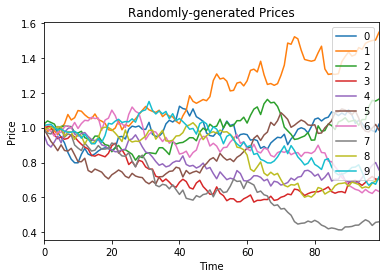

In [2]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

So let's have a look at how we actually build up to this point!

## pandas Data Structures

### `Series`

A pandas `Series` is a 1-dimensional array with labels that can contain any data type. We primarily use them for handling time series data. Creating a `Series` is as easy as calling `pandas.Series()` on a Python list or NumPy array.

In [3]:
s = pd.Series([1, 2, np.nan, 4, 5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


Every `Series` has a name. We can give the series a name as a parameter or we can define it afterwards by directly accessing the name attribute. In this case, we have given our time series no name so the attribute should be empty.

In [4]:
print(s.name)

None


This name can be directly modified with no repercussions.

In [5]:
s.name = "Toy Series"
print(s.name)

Toy Series


We call the collected axis labels of a `Series` its index. An index can either passed to a `Series` as a parameter or added later, similarly to its name. In the absence of an index, a `Series` will simply contain an index composed of integers, starting at $0$, as in the case of our "Toy Series".

In [6]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


pandas has a built-in function specifically for creating date indices, `date_range()`. We use the function here to create a new index for `s`.

In [7]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


An index must be exactly the same length as the `Series` itself. Each index must match one-to-one with each element of the `Series`. Once this is satisfied, we can directly modify the `Series` index, as with the name, to use our new and more informative index (relatively speaking).

In [8]:
s.index = new_index
print(s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


The index of the `Series` is crucial for handling time series, which we will get into a little later.

#### Accessing `Series` Elements

`Series` are typically accessed using the `iloc[]` and `loc[]` methods. We use `iloc[]` to access elements by integer index and we use `loc[]` to access the index of the Series.

In [9]:
print("First element of the series: ", s.iloc[0])
print("Last element of the series: ", s.iloc[len(s)-1])

('First element of the series: ', 1.0)
('Last element of the series: ', 5.0)


We can slice a `Series` similarly to our favorite collections, Python lists and NumPy arrays. We use the colon operator to indicate the slice.

In [10]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

When creating a slice, we have the options of specifying a beginning, an end, and a step. The slice will begin at the start index, and take steps of size `step` until it passes the end index, not including the end.

In [11]:
start = 0
end = len(s) - 1
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

We can even reverse a `Series` by specifying a negative step size. Similarly, we can index the start and end with a negative integer value.

In [12]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64

This returns a slice of the series that starts from the second to last element and ends at the third to last element (because the fourth to last is not included, taking steps of size $1$).

In [13]:
s.iloc[-2:-4:-1]

2016-01-04    4.0
2016-01-03    NaN
Freq: -1D, Name: Toy Series, dtype: float64

We can also access a series by using the values of its index. Since we indexed `s` with a collection of dates (`Timestamp` objects) we can look at the value contained in `s` for a particular date.

In [14]:
s.loc['2016-01-01']

1.0

Or even for a range of dates!

In [15]:
s.loc['2016-01-02':'2016-01-04']

2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
Freq: D, Name: Toy Series, dtype: float64

With `Series`, we *can* just use the brackets (`[]`) to access elements, but this is not best practice. The brackets are ambiguous because they can be used to access `Series` (and `DataFrames`) using both index and integer values and the results will change based on context (especially with `DataFrames`).

#### Boolean Indexing

In addition to the above-mentioned access methods, you can filter `Series` using boolean arrays. `Series` are compatible with your standard comparators. Once compared with whatever condition you like, you get back yet another `Series`, this time filled with boolean values.

In [16]:
print(s < 3)

2016-01-01     True
2016-01-02     True
2016-01-03    False
2016-01-04    False
2016-01-05    False
Freq: D, Name: Toy Series, dtype: bool


We can pass *this* `Series` back into the original `Series` to filter out only the elements for which our condition is `True`.

In [17]:
print(s.loc[s < 3])

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


If we so desire, we can group multiple conditions together using the logical operators `&`, `|`, and `~` (and, or, and not, respectively).

In [18]:
print(s.loc[(s < 3) & (s > 1)])

2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64


This is very convenient for getting only elements of a `Series` that fulfill specific criteria that we need. It gets even more convenient when we are handling `DataFrames`.

#### Indexing and Time Series

Since we use `Series` for handling time series, it's worth covering a little bit of how we handle the time component. For our purposes we use pandas `Timestamp` objects. Let's pull a full time series, complete with all the appropriate labels, by using our `get_pricing()` method. All data pulled with `get_pricing()` or using our Pipeline API will be in either `Series` or `DataFrame` format. We can modify this index however we like.

In [19]:
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 5.5MB 5.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=0ad3cbe895d36ce9633ed9e19082dc2f880efeea5e8fb3cf5f877e81f4ecc6a7
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-cp27-none-any.whl size=15192 sha256=0f64979cecfabdb2fab20b2e851b15848302feda8cdb59950ac87ab38898cd95
  Stored in directory: /root/.cache/pip/wheels/d9/7e/cf/4977a8572d5247242a4b13018d1d36923024ba84236e0d28bc
Successfully built yahoofinancials


In [20]:
import yfinance as yf
from yahoofinancials import YahooFinancials
# Reference: https://towardsdatascience.com/a-comprehensive-guide-to-downloading-stock-prices-in-python-2cd93ff821d4

In [21]:
symbol = "CMG"
start = "2012-01-01"
end = "2016-01-01"
prices = yf.download(symbol, start=start, end=end, process=False)

[*********************100%***********************]  1 of 1 completed


We can display the first few elements of our series by using the `head()` method and specifying the number of elements that we want. The analogous method for the last few elements is `tail()`.

In [22]:
print("\n", type(prices))
prices.head(5) 

('\n', <class 'pandas.core.frame.DataFrame'>)


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-03,341.269989,341.269989,350.489990,340.000000,343.700012,728100
2012-01-04,348.750000,348.750000,349.980011,345.010010,346.000000,743100
2012-01-05,350.480011,350.480011,351.980011,342.570007,346.880005,672300
2012-01-06,348.950012,348.950012,352.630005,347.350006,348.880005,370700
2012-01-09,339.739990,339.739990,349.489990,336.290009,349.000000,748600


As with our toy example, we can specify a name for our time series, if only to clarify the name the `get_pricing()` provides us.

Let's take a closer look at the `DatetimeIndex` of our `prices` time series.

In [23]:
print(prices.index)

DatetimeIndex(['2012-01-03', '2012-01-04', '2012-01-05', '2012-01-06',
               '2012-01-09', '2012-01-10', '2012-01-11', '2012-01-12',
               '2012-01-13', '2012-01-17',
               ...
               '2015-12-17', '2015-12-18', '2015-12-21', '2015-12-22',
               '2015-12-23', '2015-12-24', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name=u'Date', length=1006, freq=None)


Notice that this `DatetimeIndex` has a collection of associated information. In particular it has an associated frequency (`freq`) and an associated timezone (`tz`). The frequency indicates whether the data is daily vs monthly vs some other period while the timezone indicates what locale this index is relative to. We can modify all of this extra information!

If we resample our `Series`, we can adjust the frequency of our data. We currently have daily data (excluding weekends) because `get_pricing()` pulls only data from market days. Let's up-sample from this daily data to monthly data using the `resample()` method.

In [24]:
monthly_prices = prices.resample('M')
monthly_prices

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

The `resample()` method defaults to using the mean of the lower level data to create the higher level data. We can specify how else we might want the up-sampling to be calculated by specifying the `how` parameter.

In [25]:
monthly_prices_med = prices.resample('M', how='median')
monthly_prices_med.head(10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).median()
  """Entry point for launching an IPython kernel.


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-31,355.505005,355.505005,357.750000,352.529999,355.400009,432750
2012-02-29,378.195007,378.195007,381.485001,375.005005,377.965012,406100
2012-03-31,408.994995,408.994995,409.630005,402.559998,405.324997,371850
2012-04-30,420.835007,420.835007,425.824997,415.490005,419.865005,653100
2012-05-31,405.240005,405.240005,408.979996,401.200012,405.175003,532850
2012-06-30,402.450012,402.450012,410.989990,398.309998,404.869995,485600
2012-07-31,380.470001,380.470001,384.500000,377.190002,379.000000,747400
2012-08-31,295.390015,295.390015,298.670013,292.390015,296.290009,572300
2012-09-30,332.809998,332.809998,337.829987,330.010010,333.799988,740700


We can even specify how we want the calculation of the new period to be done. Here we create a `custom_resampler()` function that will return the first value of the period. In our specific case, this will return a `Series` where the monthly value is the first value of that month.

In [26]:
def custom_resampler(array_like):
    """ Returns the first value of the period """
    return array_like[0]

first_of_month_prices = prices.resample('M', how=custom_resampler)
first_of_month_prices.head(10)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  """


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-31,341.269989,341.269989,350.489990,340.000000,343.700012,728100
2012-02-29,370.410004,370.410004,371.619995,364.410004,368.000000,873400
2012-03-31,394.100006,394.100006,394.750000,388.000000,391.850006,387700
2012-04-30,418.399994,418.399994,421.410004,413.540009,417.000000,381300
2012-05-31,419.890015,419.890015,424.149994,414.589996,415.410004,501400
2012-06-30,397.140015,397.140015,408.940002,394.000000,404.869995,657000
2012-07-31,383.459991,383.459991,386.029999,376.260010,386.029999,872400
2012-08-31,280.670013,280.670013,293.880005,280.410004,292.869995,777400
2012-09-30,285.989990,285.989990,289.739990,283.679993,289.730011,455800


We can also adjust the timezone of a `Series` to adapt the time of real-world data. In our case, our time series is already localized to UTC, but let's say that we want to adjust the time to be 'US/Eastern'. In this case we use the `tz_convert()` method, since the time is already localized.

In addition to the capacity for timezone and frequency management, each time series has a built-in `reindex()` method that we can use to realign the existing data according to a new set of index labels. If data does not exist for a particular label, the data will be filled with a placeholder value. This is typically `np.nan`, though we can provide a fill method.

The data that we `get_pricing()` only includes market days. But what if we want prices for every single calendar day? This will include holidays and weekends, times when you normally cannot trade equities.  First let's create a new `DatetimeIndex` that contains all that we want.

In [27]:
calendar_dates = pd.date_range(start=start, end=end, freq='D', tz='UTC')
print(calendar_dates)

DatetimeIndex(['2012-01-01 00:00:00+00:00', '2012-01-02 00:00:00+00:00',
               '2012-01-03 00:00:00+00:00', '2012-01-04 00:00:00+00:00',
               '2012-01-05 00:00:00+00:00', '2012-01-06 00:00:00+00:00',
               '2012-01-07 00:00:00+00:00', '2012-01-08 00:00:00+00:00',
               '2012-01-09 00:00:00+00:00', '2012-01-10 00:00:00+00:00',
               ...
               '2015-12-23 00:00:00+00:00', '2015-12-24 00:00:00+00:00',
               '2015-12-25 00:00:00+00:00', '2015-12-26 00:00:00+00:00',
               '2015-12-27 00:00:00+00:00', '2015-12-28 00:00:00+00:00',
               '2015-12-29 00:00:00+00:00', '2015-12-30 00:00:00+00:00',
               '2015-12-31 00:00:00+00:00', '2016-01-01 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=1462, freq='D')


Now let's use this new set of dates to reindex our time series. We tell the function that the fill method that we want is `ffill`. This denotes "forward fill". Any `NaN` values will be filled by the *last value* listed. So the price on the weekend or on a holiday will be listed as the price on the last market day that we know about.

You'll notice that we still have a couple of `NaN` values right at the beginning of our time series. This is because the first of January in 2012 was a Sunday and the second was a market holiday! Because these are the earliest data points and we don't have any information from before them, they cannot be forward-filled. We will take care of these `NaN` values in the next section, when we deal with missing data.

#### Missing Data

Whenever we deal with real data, there is a very real possibility of encountering missing values. Real data is riddled with holes and pandas provides us with ways to handle them. Sometimes resampling or reindexing can create `NaN` values. Fortunately, pandas provides us with ways to handle them. We have two primary means of coping with missing data. The first of these is filling in the missing data with  `fillna()`. For example, say that we want to fill in the missing days with the mean price of all days.

In [29]:
meanfilled_prices = calendar_prices.fillna(calendar_prices.mean())
meanfilled_prices.head(10)

Using `fillna()` is fairly easy. It is just a matter of indicating the value that you want to fill the spaces with. Unfortunately, this particular case doesn't make a whole lot of sense, for reasons discussed in the [lecture on stationarity](https://www.quantopian.com/lectures/integration-cointegration-and-stationarity) in the Lecture series. We could fill them with with $0$, simply, but that's similarly uninformative.

Rather than filling in specific values, we can use the `method` parameter, similarly to how the `reindex()` method works. We could use "backward fill", where `NaN`s are filled with the *next* filled value (instead of forward fill's *last* filled value) like so:

In [30]:
bfilled_prices = calendar_prices.fillna(method='bfill')
bfilled_prices.head(10)

But again, this is a bad idea for the same reasons as the previous option. Both of these so-called solutions take into account *future data* that was not available at the time of the data points that we are trying to fill. In the case of using the mean or the median, these summary statistics are calculated by taking into account the entire time series. Backward filling is equivalent to saying that the price of a particular security today, right now, tomorrow's price. This also makes no sense. These two options are both examples of look-ahead bias, using data that would be unknown or unavailable at the desired time, and should be avoided.

Our next option is significantly more appealing. We could simply drop the missing data using the `dropna()` method. This is much better alternative than filling `NaN` values in with arbitrary numbers.

In [31]:
dropped_prices = calendar_prices.dropna()
dropped_prices.head(10)

Now our time series is cleaned for the calendar year, with all of our `NaN` values properly handled. It is time to talk about how to actually do time series analysis with pandas data structures.

#### Time Series Analysis with pandas

Let's do some basic time series analysis on our original prices. Each pandas `Series` has a built-in plotting method.

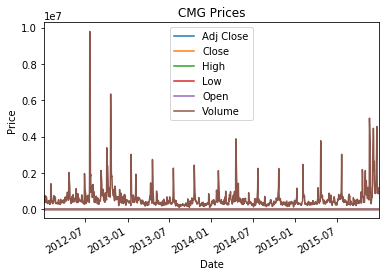

In [32]:
prices.plot();
# We still need to add the axis labels and title ourselves
plt.title(symbol + " Prices")
plt.ylabel("Price")
plt.xlabel("Date");

As well as some built-in descriptive statistics. We can either calculate these individually or using the `describe()` method.

In [33]:
print("Mean: ", prices.mean())
print("Standard deviation: ", prices.std())

('Mean: ', Adj Close       501.636650
Close           501.636650
High            506.547406
Low             496.621740
Open            501.580328
Volume       591171.868787
dtype: float64)
('Standard deviation: ', Adj Close       146.688738
Close           146.688738
High            147.589064
Low             145.792764
Open            146.831560
Volume       615931.535248
dtype: float64)


In [34]:
print("Summary Statistics")
print(prices.describe())

Summary Statistics
         Adj Close        Close         High          Low         Open  \
count  1006.000000  1006.000000  1006.000000  1006.000000  1006.000000   
mean    501.636650   501.636650   506.547406   496.621740   501.580328   
std     146.688738   146.688738   147.589064   145.792764   146.831560   
min     236.240005   236.240005   243.000000   233.820007   234.449997   
25%     371.555000   371.555000   374.037498   368.189995   370.607498   
50%     521.270020   521.270020   524.994995   515.934998   521.285004   
75%     646.834991   646.834991   651.910019   638.540024   645.989990   
max     757.770020   757.770020   758.609985   748.390015   758.489990   

             Volume  
count  1.006000e+03  
mean   5.911719e+05  
std    6.159315e+05  
min    1.012000e+05  
25%    3.189750e+05  
50%    4.262500e+05  
75%    6.282000e+05  
max    9.795100e+06  


We can easily modify `Series` with scalars using our basic mathematical operators.

In [35]:
modified_prices = prices * 2 - 10
modified_prices.head(5)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2012-01-03,672.539978,672.539978,690.979980,670.000000,677.400024,1456190
2012-01-04,687.500000,687.500000,689.960022,680.020020,682.000000,1486190
2012-01-05,690.960022,690.960022,693.960022,675.140015,683.760010,1344590
2012-01-06,687.900024,687.900024,695.260010,684.700012,687.760010,741390
2012-01-09,669.479980,669.479980,688.979980,662.580017,688.000000,1497190


And we can create linear combinations of `Series` themselves using the basic mathematical operators. pandas will group up matching indices and perform the calculations elementwise to produce a new `Series`. 

In [36]:
noisy_prices = prices + 5 * pd.Series(np.random.normal(0, 5, len(prices)), index=prices.index) + 20
noisy_prices.head(5)

,2012-01-03 00:00:00,2012-01-04 00:00:00,2012-01-05 00:00:00,2012-01-06 00:00:00,2012-01-09 00:00:00,2012-01-10 00:00:00,2012-01-11 00:00:00,2012-01-12 00:00:00,2012-01-13 00:00:00,2012-01-17 00:00:00,...,2015-12-28 00:00:00,2015-12-29 00:00:00,2015-12-30 00:00:00,2015-12-31 00:00:00,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


If there are no matching indices, however, we may get an empty `Series` in return.

In [37]:
empty_series = prices + pd.Series(np.random.normal(0, 1, len(prices)))
empty_series.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1002,1003,1004,1005,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Rather than looking at a time series itself, we may want to look at its first-order differences or percent change (in order to get additive or multiplicative returns, in our particular case). Both of these are built-in methods.

In [39]:
add_returns = prices.diff()[1:]
mult_returns = prices.pct_change()[1:]

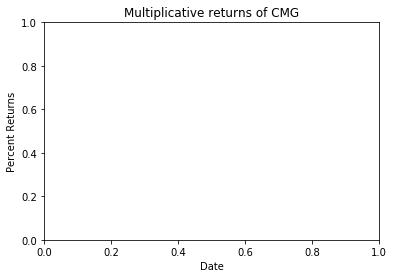

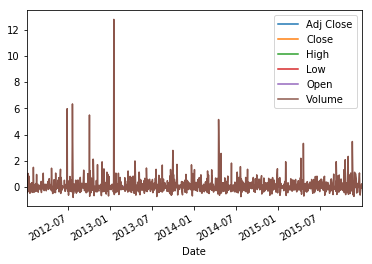

In [40]:
plt.title("Multiplicative returns of " + symbol)
plt.xlabel("Date")
plt.ylabel("Percent Returns")
mult_returns.plot();

pandas has convenient functions for calculating rolling means and standard deviations, as well!

In [41]:
rolling_mean = prices.rolling(30)
rolling_mean.name = "30-day rolling mean"

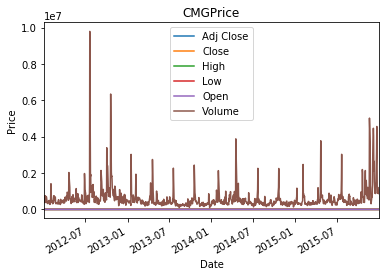

In [42]:
prices.plot()
plt.title(symbol + "Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

In [43]:
rolling_std = prices.rolling(30)
rolling_std.name = "30-day rolling volatility"

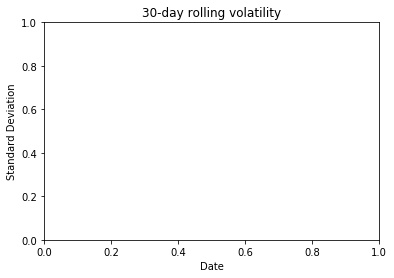

In [44]:
plt.title(rolling_std.name);
plt.xlabel("Date")
plt.ylabel("Standard Deviation");

Many NumPy functions will work on `Series` the same way that they work on 1-dimensional NumPy arrays.

In [45]:
print(np.median(mult_returns))

0.0005465394818680025


The majority of these functions, however, are already implemented directly as `Series` and `DataFrame` methods.

In [46]:
print(mult_returns.median())

Adj Close    0.000236
Close        0.000236
High         0.000051
Low          0.001460
Open         0.000879
Volume      -0.016473
dtype: float64


In every case, using the built-in pandas method will be better than using the NumPy function on a pandas data structure due to improvements in performance. Make sure to check out the `Series` [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) before resorting to other calculations of common functions.

### `DataFrames`

Many of the aspects of working with `Series` carry over into `DataFrames`. pandas `DataFrames` allow us to easily manage our data with their intuitive structure. 

Like `Series`, `DataFrames` can hold multiple types of data, but `DataFrames` are 2-dimensional objects, unlike `Series`. Each `DataFrame` has an index and a columns attribute, which we will cover more in-depth when we start actually playing with an object. The index attribute is like the index of a `Series`, though indices in pandas have some extra features that we will unfortunately not be able to cover here. If you are interested in this, check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/version/0.18.1/advanced.html) on advanced indexing. The columns attribute is what provides the second dimension of our `DataFrames`, allowing us to combine named columns (all `Series`), into a cohesive object with the index lined-up.

We can create a `DataFrame` by calling `pandas.DataFrame()` on a dictionary or NumPy `ndarray`. We can also concatenate a group of pandas `Series` into a `DataFrame` using `pandas.concat()`.

In [47]:
dict_data = {
    'a' : [1, 2, 3, 4, 5],
    'b' : ['L', 'K', 'J', 'M', 'Z'],
    'c' : np.random.normal(0, 1, 5)
}
print(dict_data)

{'a': [1, 2, 3, 4, 5], 'c': array([-0.3684883 ,  1.29135204,  1.19324925, -0.73478827,  0.24587922]), 'b': ['L', 'K', 'J', 'M', 'Z']}


Each `DataFrame` has a few key attributes that we need to keep in mind. The first of these is the index attribute. We can easily include an index of `Timestamp` objects like we did with `Series`.

In [48]:
frame_data = pd.DataFrame(dict_data, index=pd.date_range('2016-01-01', periods=5))
print(frame_data)

            a  b         c
2016-01-01  1  L -0.368488
2016-01-02  2  K  1.291352
2016-01-03  3  J  1.193249
2016-01-04  4  M -0.734788
2016-01-05  5  Z  0.245879


As mentioned above, we can combine `Series` into `DataFrames`. Concatatenating `Series` like this will match elements up based on their corresponding index. As the following `Series` do not have an index assigned, they each default to an integer index. 

In [49]:
s_1 = pd.Series([2, 4, 6, 8, 10], name='Evens')
s_2 = pd.Series([1, 3, 5, 7, 9], name="Odds")
numbers = pd.concat([s_1, s_2], axis=1)
print(numbers)

   Evens  Odds
0      2     1
1      4     3
2      6     5
3      8     7
4     10     9


We will use `pandas.concat()` again later to combine multiple `DataFrame`s into one. 

Each `DataFrame` also has a `columns` attribute. These can either be assigned when we call `pandas.DataFrame` or they can be modified directly like the index. Note that when we concatenated the two `Series` above, the column names were the names of those `Series`.

In [50]:
print(numbers.columns)

Index([u'Evens', u'Odds'], dtype='object')


To modify the columns after object creation, we need only do the following:

In [51]:
numbers.columns = ['Shmevens', 'Shmodds']
print(numbers)

   Shmevens  Shmodds
0         2        1
1         4        3
2         6        5
3         8        7
4        10        9


In the same vein, the index of a `DataFrame` can be changed after the fact.

In [52]:
print(numbers.index)

In [53]:
numbers.index = pd.date_range("2016-01-01", periods=len(numbers))
print(numbers)

            Shmevens  Shmodds
2016-01-01         2        1
2016-01-02         4        3
2016-01-03         6        5
2016-01-04         8        7
2016-01-05        10        9


Separate from the columns and index of a `DataFrame`, we can also directly access the values they contain by looking at the values attribute.

In [54]:
numbers.values

array([[ 2,  1],
       [ 4,  3],
       [ 6,  5],
       [ 8,  7],
       [10,  9]])

This returns a NumPy array.

In [55]:
type(numbers.values)

numpy.ndarray

#### Accessing `DataFrame` elements

Again we see a lot of carryover from `Series` in how we access the elements of `DataFrames`. The key sticking point here is that everything has to take into account multiple dimensions now. The main way that this happens is through the access of the columns of a `DataFrame`, either individually or in groups. We can do this either by directly accessing the attributes or by using the methods we already are familiar with.

In [56]:
symbol = ["CMG", "MCD", "SHAK", "WFM"]
start = "2012-01-01"
end = "2016-01-01"
prices = yf.download(symbol, start=start, end=end, process=False, fields="price")

[*********************100%***********************]  4 of 4 completed

1 Failed download:
- WFM: No data found for this date range, symbol may be delisted


Here we directly access the `CMG` column. Note that this style of access will only work if your column name has no spaces or unfriendly characters in it.

In [57]:
prices.CMG.head()

We can also use `loc[]` to access an individual column like so.

In [57]:
prices.loc[:, 'CMG'].head()

Accessing an individual column will return a `Series`, regardless of how we get it.

In [58]:
X = type(prices.CMG)
Y = type(prices.loc[:, 'CMG'])

Notice how we pass a tuple into the `loc[]` method? This is a key difference between accessing a `Series` and accessing a `DataFrame`, grounded in the fact that a `DataFrame` has multiple dimensions. When you pass a 2-dimensional tuple into a `DataFrame`, the first element of the tuple is applied to the rows and the second is applied to the columns. So, to break it down, the above line of code tells the `DataFrame` to return every single row of the column with label `'CMG'`. Lists of columns are also supported.

In [60]:
prices.loc[:, ['CMG', 'MCD']].head()

We can also simply access the `DataFrame` by index value using `loc[]`, as with `Series`.

In [60]:
prices.loc['2015-12-15':'2015-12-22']

This plays nicely with lists of columns, too.

In [60]:
prices.loc['2015-12-15':'2015-12-22', ['CMG', 'MCD']]

Using `iloc[]` also works similarly, allowing you to access parts of the `DataFrame` by integer index.

In [60]:
prices.iloc[0:2, 1]

In [60]:
# Access prices with integer index in
# [1, 3, 5, 7, 9, 11, 13, ..., 99]
# and in column 0 or 3
prices.iloc[[1, 3, 5] + range(7, 100, 2), [0, 3]].head(20)

#### Boolean indexing

As with `Series`, sometimes we want to filter a `DataFrame` according to a set of criteria. We do this by indexing our `DataFrame` with boolean values.

In [61]:
prices.loc[prices.MCD > prices.WFM].head()

We can add multiple boolean conditions by using the logical operators `&`, `|`, and `~` (and, or, and not, respectively) again!

In [61]:
prices.loc[(prices.MCD > prices.WFM) & ~prices.SHAK.isnull()].head()

#### Adding, Removing Columns, Combining `DataFrames`/`Series`

It is all well and good when you already have a `DataFrame` filled with data, but it is also important to be able to add to the data that you have.

We add a new column simply by assigning data to a column that does not already exist. Here we use the `.loc[:, 'COL_NAME']` notation and store the output of `get_pricing()` (which returns a pandas `Series` if we only pass one security) there. This is the method that we would use to add a `Series` to an existing `DataFrame`.

In [63]:
s_1 = yf.download('TSLA', start=start, end=end, provess=False, fields='price')
prices.loc[:, 'TSLA'] = s_1
prices.head(5)

[*********************100%***********************]  1 of 1 completed


Adj Close                           Close                       \
                   CMG        MCD SHAK WFM         CMG         MCD SHAK WFM   
Date                                                                          
2012-01-03  341.269989  75.681129  NaN NaN  341.269989   98.839996  NaN NaN   
2012-01-04  348.750000  76.102287  NaN NaN  348.750000   99.389999  NaN NaN   
2012-01-05  350.480011  76.439156  NaN NaN  350.480011   99.830002  NaN NaN   
2012-01-06  348.950012  77.028755  NaN NaN  348.950012  100.599998  NaN NaN   
2012-01-09  339.739990  76.293686  NaN NaN  339.739990   99.639999  NaN NaN   

                  High              ... Low        Open                       \
                   CMG         MCD  ... WFM         CMG         MCD SHAK WFM   
Date                                ...                                        
2012-01-03  350.489990  101.589996  ... NaN  343.700012  101.330002  NaN NaN   
2012-01-04  349.980011  100.300003  ... NaN  346.000000   99.110001  NaN NaN   
2012-01-05  351.980011  100.400002  ... NaN  346.880005   99.470001  NaN NaN   
2012-01-06  352.630005  100.769997  ... NaN  348.880005  100.089996  NaN NaN   
2012-01-09  349.489990  100.930000  ... NaN  349.000000  100.879997  NaN NaN   

            Volume                   TSLA  
               CMG      MCD SHAK WFM       
Date                                       
2012-01-03  728100  8895900  NaN NaN  NaN  
2012-01-04  743100  6754700  NaN NaN  NaN  
2012-01-05  672300  8163800  NaN NaN  NaN  
2012-01-06  370700  6775300  NaN NaN  NaN  
2012-01-09  748600  4433700  NaN NaN  NaN  

[5 rows x 25 columns]

It is also just as easy to remove a column.

In [64]:
prices = prices.drop('TSLA', axis=1)
prices.head(5)

Adj Close                           Close                       \
                   CMG        MCD SHAK WFM         CMG         MCD SHAK WFM   
Date                                                                          
2012-01-03  341.269989  75.681129  NaN NaN  341.269989   98.839996  NaN NaN   
2012-01-04  348.750000  76.102287  NaN NaN  348.750000   99.389999  NaN NaN   
2012-01-05  350.480011  76.439156  NaN NaN  350.480011   99.830002  NaN NaN   
2012-01-06  348.950012  77.028755  NaN NaN  348.950012  100.599998  NaN NaN   
2012-01-09  339.739990  76.293686  NaN NaN  339.739990   99.639999  NaN NaN   

                  High              ...  Low            Open                   \
                   CMG         MCD  ... SHAK WFM         CMG         MCD SHAK   
Date                                ...                                         
2012-01-03  350.489990  101.589996  ...  NaN NaN  343.700012  101.330002  NaN   
2012-01-04  349.980011  100.300003  ...  NaN NaN  346.000000   99.110001  NaN   
2012-01-05  351.980011  100.400002  ...  NaN NaN  346.880005   99.470001  NaN   
2012-01-06  352.630005  100.769997  ...  NaN NaN  348.880005  100.089996  NaN   
2012-01-09  349.489990  100.930000  ...  NaN NaN  349.000000  100.879997  NaN   

                Volume                    
           WFM     CMG      MCD SHAK WFM  
Date                                      
2012-01-03 NaN  728100  8895900  NaN NaN  
2012-01-04 NaN  743100  6754700  NaN NaN  
2012-01-05 NaN  672300  8163800  NaN NaN  
2012-01-06 NaN  370700  6775300  NaN NaN  
2012-01-09 NaN  748600  4433700  NaN NaN  

[5 rows x 24 columns]

If we instead want to combine multiple `DataFrame`s into one, we use the `pandas.concat()` method.

In [65]:
df_1 = yf.download(['SPY', 'VXX'], start=start, end=end, process=False, fields='price')
df_2 = yf.download(['MSFT', 'AAPL', 'GOOG'], start=start, end=end, process=False, fields='price')
df_3 = pd.concat([df_1, df_2], axis=1)
df_3.head()

[*********************100%***********************]  2 of 2 completed

1 Failed download:
- VXX: Data doesn't exist for startDate = 1325376000, endDate = 1451606400
[*********************100%***********************]  3 of 3 completed


Adj Close           Close            High             Low      \
                   SPY VXX         SPY VXX         SPY VXX         SPY VXX   
Date                                                                         
2012-01-03  106.680183 NaN  127.500000 NaN  128.380005 NaN  127.430000 NaN   
2012-01-04  106.847527 NaN  127.699997 NaN  127.809998 NaN  126.709999 NaN   
2012-01-05  107.132004 NaN  128.039993 NaN  128.229996 NaN  126.430000 NaN   
2012-01-06  106.855896 NaN  127.709999 NaN  128.220001 NaN  127.290001 NaN   
2012-01-09  107.115288 NaN  128.020004 NaN  128.179993 NaN  127.410004 NaN   

                  Open      ...       High        Low                         \
                   SPY VXX  ...       MSFT       AAPL        GOOG       MSFT   
Date                        ...                                                
2012-01-03  127.760002 NaN  ...  26.959999  14.607143  324.966949  26.389999   
2012-01-04  127.199997 NaN  ...  27.469999  14.617143  329.076538  26.780001   
2012-01-05  127.010002 NaN  ...  27.730000  14.738214  326.889740  27.290001   
2012-01-06  128.199997 NaN  ...  28.190001  14.972143  323.681763  27.530001   
2012-01-09  128.000000 NaN  ...  28.100000  15.048214  309.455078  27.719999   

                 Open                            Volume                      
                 AAPL        GOOG       MSFT       AAPL      GOOG      MSFT  
Date                                                                         
2012-01-03  14.621429  325.250885  26.549999  302220800   7380561  64731500  
2012-01-04  14.642857  331.273315  26.820000  260022000   5749470  80516100  
2012-01-05  14.819643  329.828735  27.379999  271269600   6590410  56081400  
2012-01-06  14.991786  328.344299  27.530001  318292800   5405987  99455500  
2012-01-09  15.196429  322.042908  28.049999  394024400  11688849  59706800  

[5 rows x 30 columns]

#### Missing data (again)
Bringing real-life data into a `DataFrame` brings us the same problems that we had with it in a `Series`, only this time in more dimensions. We have access to the same methods as with `Series`, as demonstrated below.

In [66]:
filled0_prices = prices.fillna(0)
filled0_prices.head(5)

Adj Close                            Close                        \
                   CMG        MCD SHAK  WFM         CMG         MCD SHAK  WFM   
Date                                                                            
2012-01-03  341.269989  75.681129  0.0  0.0  341.269989   98.839996  0.0  0.0   
2012-01-04  348.750000  76.102287  0.0  0.0  348.750000   99.389999  0.0  0.0   
2012-01-05  350.480011  76.439156  0.0  0.0  350.480011   99.830002  0.0  0.0   
2012-01-06  348.950012  77.028755  0.0  0.0  348.950012  100.599998  0.0  0.0   
2012-01-09  339.739990  76.293686  0.0  0.0  339.739990   99.639999  0.0  0.0   

                  High              ...  Low             Open              \
                   CMG         MCD  ... SHAK  WFM         CMG         MCD   
Date                                ...                                     
2012-01-03  350.489990  101.589996  ...  0.0  0.0  343.700012  101.330002   
2012-01-04  349.980011  100.300003  ...  0.0  0.0  346.000000   99.110001   
2012-01-05  351.980011  100.400002  ...  0.0  0.0  346.880005   99.470001   
2012-01-06  352.630005  100.769997  ...  0.0  0.0  348.880005  100.089996   
2012-01-09  349.489990  100.930000  ...  0.0  0.0  349.000000  100.879997   

                      Volume                     
           SHAK  WFM     CMG      MCD SHAK  WFM  
Date                                             
2012-01-03  0.0  0.0  728100  8895900  0.0  0.0  
2012-01-04  0.0  0.0  743100  6754700  0.0  0.0  
2012-01-05  0.0  0.0  672300  8163800  0.0  0.0  
2012-01-06  0.0  0.0  370700  6775300  0.0  0.0  
2012-01-09  0.0  0.0  748600  4433700  0.0  0.0  

[5 rows x 24 columns]

In [67]:
bfilled_prices = prices.fillna(method='bfill')
bfilled_prices.head(5)

Adj Close                                 Close              \
                   CMG        MCD       SHAK WFM         CMG         MCD   
Date                                                                       
2012-01-03  341.269989  75.681129  45.900002 NaN  341.269989   98.839996   
2012-01-04  348.750000  76.102287  45.900002 NaN  348.750000   99.389999   
2012-01-05  350.480011  76.439156  45.900002 NaN  350.480011   99.830002   
2012-01-06  348.950012  77.028755  45.900002 NaN  348.950012  100.599998   
2012-01-09  339.739990  76.293686  45.900002 NaN  339.739990   99.639999   

                                 High              ...        Low      \
                 SHAK WFM         CMG         MCD  ...       SHAK WFM   
Date                                               ...                  
2012-01-03  45.900002 NaN  350.489990  101.589996  ...  45.119999 NaN   
2012-01-04  45.900002 NaN  349.980011  100.300003  ...  45.119999 NaN   
2012-01-05  45.900002 NaN  351.980011  100.400002  ...  45.119999 NaN   
2012-01-06  45.900002 NaN  352.630005  100.769997  ...  45.119999 NaN   
2012-01-09  45.900002 NaN  349.489990  100.930000  ...  45.119999 NaN   

                  Open                        Volume                           
                   CMG         MCD  SHAK WFM     CMG      MCD        SHAK WFM  
Date                                                                           
2012-01-03  343.700012  101.330002  47.0 NaN  728100  8895900  16264900.0 NaN  
2012-01-04  346.000000   99.110001  47.0 NaN  743100  6754700  16264900.0 NaN  
2012-01-05  346.880005   99.470001  47.0 NaN  672300  8163800  16264900.0 NaN  
2012-01-06  348.880005  100.089996  47.0 NaN  370700  6775300  16264900.0 NaN  
2012-01-09  349.000000  100.879997  47.0 NaN  748600  4433700  16264900.0 NaN  

[5 rows x 24 columns]

But again, the best choice in this case (since we are still using time series data, handling multiple time series at once) is still to simply drop the missing values.

In [68]:
dropped_prices = prices.dropna()
dropped_prices.head(5)

Empty DataFrame
Columns: [(Adj Close, CMG), (Adj Close, MCD), (Adj Close, SHAK), (Adj Close, WFM), (Close, CMG), (Close, MCD), (Close, SHAK), (Close, WFM), (High, CMG), (High, MCD), (High, SHAK), (High, WFM), (Low, CMG), (Low, MCD), (Low, SHAK), (Low, WFM), (Open, CMG), (Open, MCD), (Open, SHAK), (Open, WFM), (Volume, CMG), (Volume, MCD), (Volume, SHAK), (Volume, WFM)]
Index: []

[0 rows x 24 columns]

#### Time Series Analysis with pandas

Using the built-in statistics methods for `DataFrames`, we can perform calculations on multiple time series at once! The code to perform calculations on `DataFrames` here is almost exactly the same as the methods used for `Series` above, so don't worry about re-learning everything.

The `plot()` method makes another appearance here, this time with a built-in legend that corresponds to the names of the columns that you are plotting.

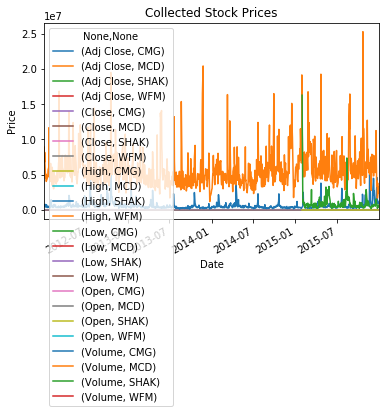

In [69]:
prices.plot()
plt.title("Collected Stock Prices")
plt.ylabel("Price")
plt.xlabel("Date");

The same statistical functions from our interactions with `Series` resurface here with the addition of the `axis` parameter. By specifying the `axis`, we tell pandas to calculate the desired function along either the rows (`axis=0`) or the columns (`axis=1`). We can easily calculate the mean of each columns like so:

In [70]:
prices.mean(axis=0)

Adj Close  CMG     5.016367e+02
           MCD     7.897940e+01
           SHAK    5.357571e+01
           WFM              NaN
Close      CMG     5.016367e+02
           MCD     9.662160e+01
           SHAK    5.357571e+01
           WFM              NaN
High       CMG     5.065474e+02
           MCD     9.717556e+01
           SHAK    5.530241e+01
           WFM              NaN
Low        CMG     4.966217e+02
           MCD     9.605330e+01
           SHAK    5.198364e+01
           WFM              NaN
Open       CMG     5.015803e+02
           MCD     9.659987e+01
           SHAK    5.375524e+01
           WFM              NaN
Volume     CMG     5.911719e+05
           MCD     5.720530e+06
           SHAK    8.949459e+05
           WFM              NaN
dtype: float64

As well as the standard deviation:

In [71]:
prices.std(axis=0)

Adj Close  CMG     1.466887e+02
           MCD     6.699071e+00
           SHAK    1.196859e+01
           WFM              NaN
Close      CMG     1.466887e+02
           MCD     5.714226e+00
           SHAK    1.196859e+01
           WFM              NaN
High       CMG     1.475891e+02
           MCD     5.704697e+00
           SHAK    1.256933e+01
           WFM              NaN
Low        CMG     1.457928e+02
           MCD     5.653356e+00
           SHAK    1.142718e+01
           WFM              NaN
Open       CMG     1.468316e+02
           MCD     5.664326e+00
           SHAK    1.212512e+01
           WFM              NaN
Volume     CMG     6.159315e+05
           MCD     2.550258e+06
           SHAK    1.243824e+06
           WFM              NaN
dtype: float64

Again, the `describe()` function will provide us with summary statistics of our data if we would rather have all of our typical statistics in a convenient visual instead of calculating them individually.

In [72]:
prices.describe()

Adj Close                                      Close               \
               CMG          MCD        SHAK  WFM          CMG          MCD   
count  1006.000000  1006.000000  233.000000  0.0  1006.000000  1006.000000   
mean    501.636650    78.979400   53.575708  NaN   501.636650    96.621600   
std     146.688738     6.699071   11.968587  NaN   146.688738     5.714226   
min     236.240005    65.829971   38.189999  NaN   236.240005    84.050003   
25%     371.555000    75.829334   44.119999  NaN   371.555000    93.672499   
50%     521.270020    78.654839   49.270000  NaN   521.270020    96.290001   
75%     646.834991    82.062105   61.669998  NaN   646.834991    99.137499   
max     757.770020   104.861481   92.860001  NaN   757.770020   120.070000   

                               High               ...         Low       \
             SHAK  WFM          CMG          MCD  ...        SHAK  WFM   
count  233.000000  0.0  1006.000000  1006.000000  ...  233.000000  0.0   
mean    53.575708  NaN   506.547406    97.175557  ...   51.983639  NaN   
std     11.968587  NaN   147.589064     5.704697  ...   11.427183  NaN   
min     38.189999  NaN   243.000000    84.389999  ...   37.599998  NaN   
25%     44.119999  NaN   374.037498    94.152502  ...   43.021999  NaN   
50%     49.270000  NaN   524.994995    96.970001  ...   48.200001  NaN   
75%     61.669998  NaN   651.910019    99.627499  ...   59.720001  NaN   
max     92.860001  NaN   758.609985   120.230003  ...   90.120003  NaN   

              Open                                      Volume                \
               CMG          MCD        SHAK  WFM           CMG           MCD   
count  1006.000000  1006.000000  233.000000  0.0  1.006000e+03  1.006000e+03   
mean    501.580328    96.599871   53.755236  NaN  5.911719e+05  5.720530e+06   
std     146.831560     5.664326   12.125123  NaN  6.159315e+05  2.550258e+06   
min     234.449997    84.169998   38.189999  NaN  1.012000e+05  1.155900e+06   
25%     370.607498    93.699997   44.299999  NaN  3.189750e+05  4.163900e+06   
50%     521.285004    96.300003   49.450001  NaN  4.262500e+05  5.093650e+06   
75%     645.989990    99.027498   61.590000  NaN  6.282000e+05  6.509425e+06   
max     758.489990   119.639999   94.389999  NaN  9.795100e+06  2.528660e+07   

                          
               SHAK  WFM  
count  2.330000e+02  0.0  
mean   8.949459e+05  NaN  
std    1.243824e+06  NaN  
min    1.620000e+05  NaN  
25%    4.211000e+05  NaN  
50%    5.993000e+05  NaN  
75%    9.364000e+05  NaN  
max    1.626490e+07  NaN  

[8 rows x 24 columns]

We can scale and add scalars to our `DataFrame`, as you might suspect after dealing with `Series`. This again works element-wise.

In [73]:
(2 * prices - 50).head(5)

Adj Close                            Close                       \
                   CMG         MCD SHAK WFM         CMG         MCD SHAK WFM   
Date                                                                           
2012-01-03  632.539978  101.362259  NaN NaN  632.539978  147.679993  NaN NaN   
2012-01-04  647.500000  102.204575  NaN NaN  647.500000  148.779999  NaN NaN   
2012-01-05  650.960022  102.878311  NaN NaN  650.960022  149.660004  NaN NaN   
2012-01-06  647.900024  104.057510  NaN NaN  647.900024  151.199997  NaN NaN   
2012-01-09  629.479980  102.587372  NaN NaN  629.479980  149.279999  NaN NaN   

                  High              ...  Low            Open                   \
                   CMG         MCD  ... SHAK WFM         CMG         MCD SHAK   
Date                                ...                                         
2012-01-03  650.979980  153.179993  ...  NaN NaN  637.400024  152.660004  NaN   
2012-01-04  649.960022  150.600006  ...  NaN NaN  642.000000  148.220001  NaN   
2012-01-05  653.960022  150.800003  ...  NaN NaN  643.760010  148.940002  NaN   
2012-01-06  655.260010  151.539993  ...  NaN NaN  647.760010  150.179993  NaN   
2012-01-09  648.979980  151.860001  ...  NaN NaN  648.000000  151.759995  NaN   

                 Volume                     
           WFM      CMG       MCD SHAK WFM  
Date                                        
2012-01-03 NaN  1456150  17791750  NaN NaN  
2012-01-04 NaN  1486150  13509350  NaN NaN  
2012-01-05 NaN  1344550  16327550  NaN NaN  
2012-01-06 NaN   741350  13550550  NaN NaN  
2012-01-09 NaN  1497150   8867350  NaN NaN  

[5 rows x 24 columns]

Here we use the `pct_change()` method to get a `DataFrame` of the multiplicative returns of the securities that we are looking at.

In [74]:
mult_returns = prices.pct_change()[1:]
mult_returns.head()

Adj Close                        Close                     \
                 CMG       MCD SHAK WFM       CMG       MCD SHAK WFM   
Date                                                                   
2012-01-04  0.021918  0.005565  NaN NaN  0.021918  0.005565  NaN NaN   
2012-01-05  0.004961  0.004427  NaN NaN  0.004961  0.004427  NaN NaN   
2012-01-06 -0.004365  0.007713  NaN NaN -0.004365  0.007713  NaN NaN   
2012-01-09 -0.026394 -0.009543  NaN NaN -0.026394 -0.009543  NaN NaN   
2012-01-10  0.004062  0.000602  NaN NaN  0.004062  0.000602  NaN NaN   

                High            ...  Low          Open                     \
                 CMG       MCD  ... SHAK WFM       CMG       MCD SHAK WFM   
Date                            ...                                         
2012-01-04 -0.001455 -0.012698  ...  NaN NaN  0.006692 -0.021909  NaN NaN   
2012-01-05  0.005715  0.000997  ...  NaN NaN  0.002543  0.003632  NaN NaN   
2012-01-06  0.001847  0.003685  ...  NaN NaN  0.005766  0.006233  NaN NaN   
2012-01-09 -0.008905  0.001588  ...  NaN NaN  0.000344  0.007893  NaN NaN   
2012-01-10 -0.014736 -0.004756  ...  NaN NaN -0.014842 -0.006344  NaN NaN   

              Volume                     
                 CMG       MCD SHAK WFM  
Date                                     
2012-01-04  0.020602 -0.240695  NaN NaN  
2012-01-05 -0.095277  0.208610  NaN NaN  
2012-01-06 -0.448609 -0.170080  NaN NaN  
2012-01-09  1.019423 -0.345608  NaN NaN  
2012-01-10 -0.327411  0.144732  NaN NaN  

[5 rows x 24 columns]

If we use our statistics methods to standardize the returns, a common procedure when examining data, then we can get a better idea of how they all move relative to each other on the same scale.

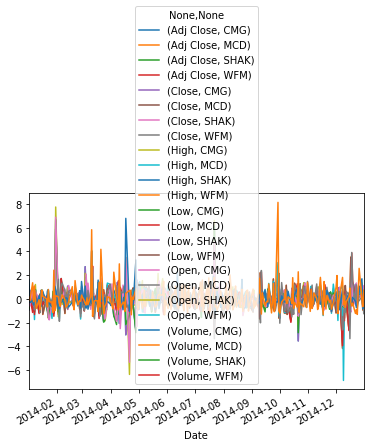

In [75]:
norm_returns = (mult_returns - mult_returns.mean(axis=0))/mult_returns.std(axis=0)
norm_returns.loc['2014-01-01':'2015-01-01'].plot();

This makes it easier to compare the motion of the different time series contained in our example.

Rolling means and standard deviations also work with `DataFrames`.

In [76]:
rolling_mean = prices.rolling(30)
rolling_mean.columns = prices.columns
rolling_mean

Rolling [window=30,center=False,axis=0]

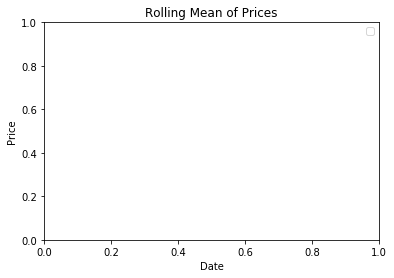

In [77]:
plt.title("Rolling Mean of Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend();

For a complete list of all the methods that are built into `DataFrame`s, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

# Next Steps

Managing data gets a lot easier when you deal with pandas, though this has been a very general introduction. There are many more tools within the package which you may discover while trying to get your data to do precisely what you want. If you would rather read more on the additional capabilities of pandas, check out the [documentation](http://pandas.pydata.org/pandas-docs/stable/).

*This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*